## Azure Machine Learning and R

### Setup
Before running through this notebook, make sure you have executed setup.R by running this in a terminal on the Notebook VM:

```shell
Rscript setup.R
```


In [25]:
library(azuremlsdk)
library(data.table)
library(ggplot2)

In [9]:
ws = load_workspace_from_config()

In [11]:
attrition = ws$datasets$`IBM-Employee-Attrition`

In [12]:
mc = attrition$to_csv_files()$mount()

In [13]:
mc$start()

In [22]:
csv_file = paste(mc$mount_point, 'part-00000', sep = '/')

In [23]:
df = fread(file=csv_file)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


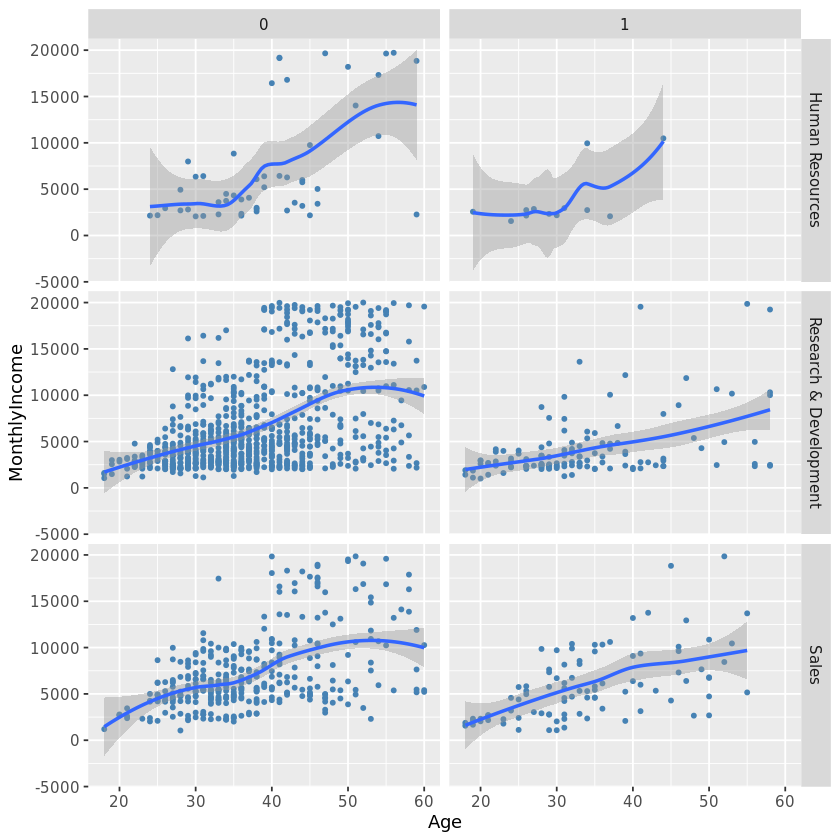

In [70]:
gg <- ggplot(df, aes(x=Age, y=MonthlyIncome))
gg = gg + geom_point(size=1, color='steelblue') 
gg = gg + geom_smooth(aes())
gg = gg + facet_grid(Department ~ Attrition) 
gg

In [58]:
names(df)

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeCount"            "EmployeeNumber"          
[11] "EnvironmentSatisfaction"  "Gender"                  
[13] "HourlyRate"               "JobInvolvement"          
[15] "JobLevel"                 "JobRole"                 
[17] "JobSatisfaction"          "MaritalStatus"           
[19] "MonthlyIncome"            "MonthlyRate"             
[21] "NumCompaniesWorked"       "Over18"                  
[23] "OverTime"                 "PercentSalaryHike"       
[25] "PerformanceRating"        "RelationshipSatisfaction"
[27] "StandardHours"            "StockOptionLevel"        
[29] "TotalWorkingYears"        "TrainingTimesLastYear"   
[31] "WorkLifeBalance"          "YearsAtCompany"          
[33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
[35] "YearsWithCurrManager"

Stop the mount (will automatically be stopped once the kernel is stopped)

In [ ]:
mc$stop()